In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer

In [2]:
# load the data from csv file to Pandas DataFrame

df = pd.read_csv("tested.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# number of rows and columns

df.shape

(418, 12)

In [5]:
# printing the first 5 rows of the dataframe

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# getting some informations about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
df.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,True,True,True,True,True,False,True,True,True,True,False,True
414,True,True,True,True,True,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True,True,True,True,False,True
416,True,True,True,True,True,False,True,True,True,True,False,True


In [10]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [11]:
# check the number of missing values in each column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling the Missing Values

In [12]:
df = df.fillna(0)

In [13]:
# drop the "Cabin" column from the dataframe

df=df.drop('Cabin',axis=1)

In [14]:
# replacing the missing values in "Age" column with mean value

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
# finding the mode value of "Embarked" column

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [17]:
df.describe()
#getting some statistical measures about the data the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,24.044258,0.447368,0.392344,35.541956
std,120.810458,0.481622,0.841838,17.599608,0.896760,0.981429,55.867684
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,9.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
df['Age'].value_counts()

Age
0.0     86
24.0    17
21.0    17
22.0    16
30.0    15
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 80, dtype: int64

In [19]:
df['Survived'].value_counts()
#finding the number of people survived and not survived

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

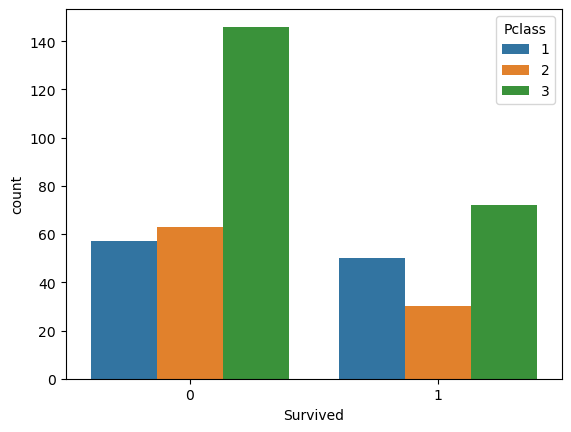

In [20]:
#lets visualize the count of survivals wrt pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [21]:
df["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

# Data Visualization

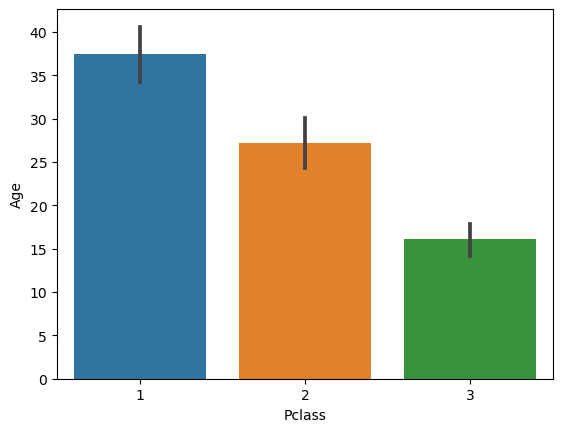

In [22]:
# making a bar plot for "Survived" column

sns.barplot(x='Pclass',y='Age',data=df)
plt.show()

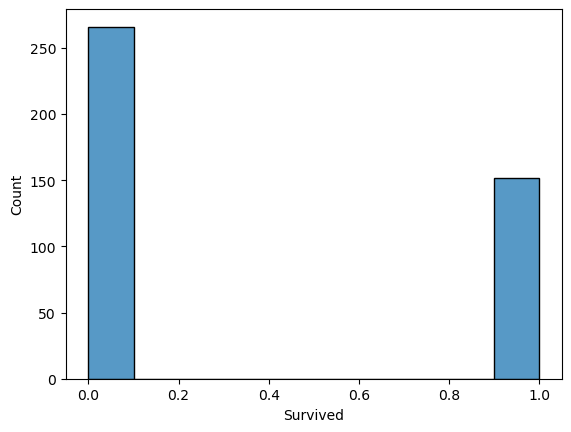

In [23]:
# making a histogram for "Survived" column

sns.histplot(x="Survived" ,data=df,)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


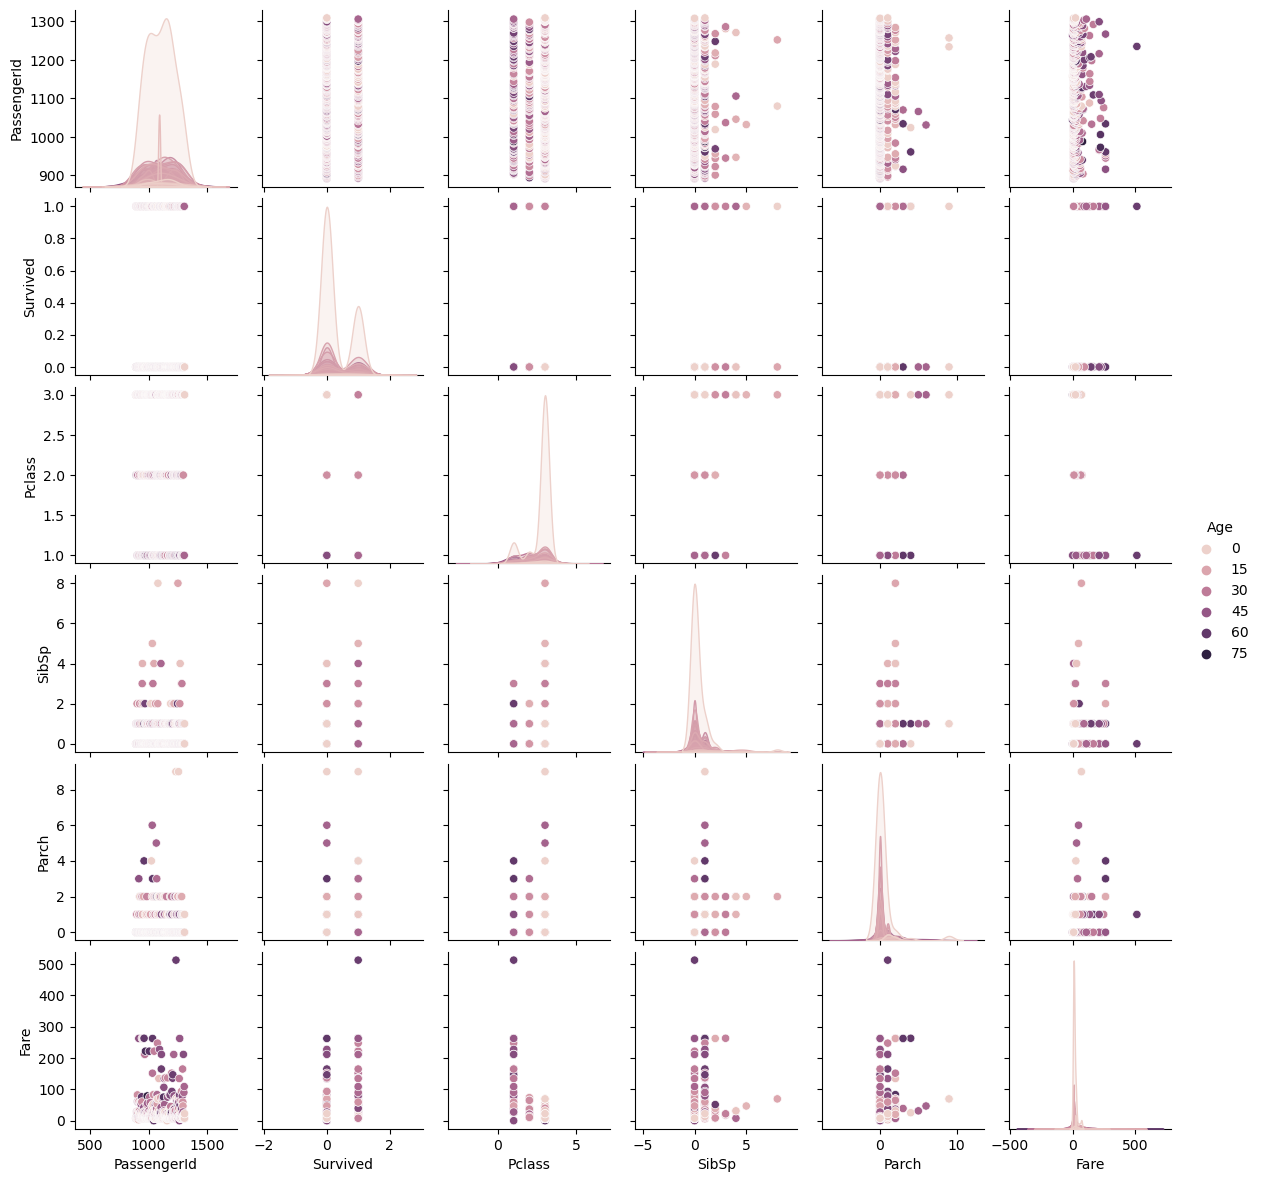

In [24]:
# making a pair plot for "Survived" column

sns.pairplot(df, hue='Age', height=2)

<Axes: xlabel='Survived', ylabel='count'>

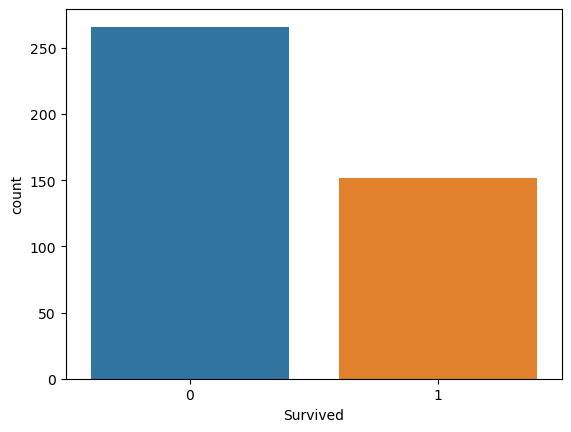

In [25]:
sns.countplot(x=df["Survived"])
#making a count plot for "Survived" column

<Axes: xlabel='Age', ylabel='count'>

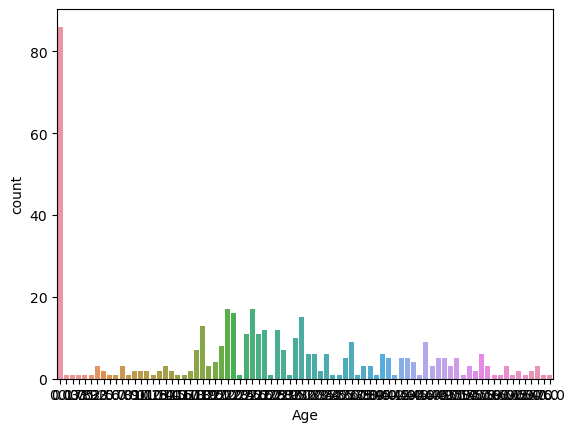

In [26]:
sns.countplot(x="Age",data=df)
#making a count plot for "Age" column

<Axes: xlabel='Survived', ylabel='count'>

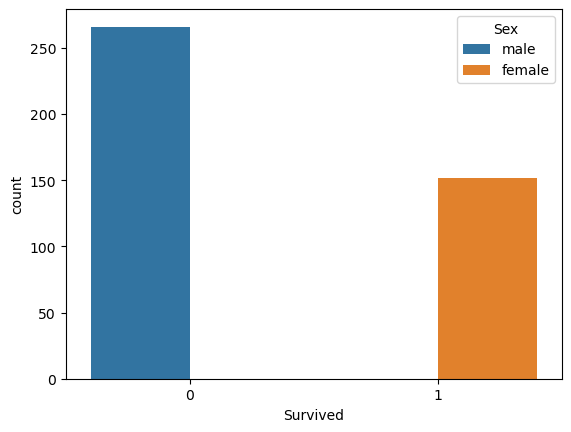

In [27]:
# making a count plot for "Sex" column

sns.countplot(x='Survived', hue='Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

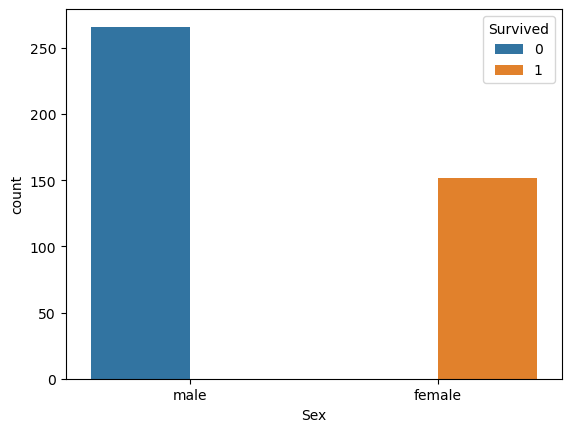

In [28]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=df)

In [29]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [30]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex']=labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [33]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

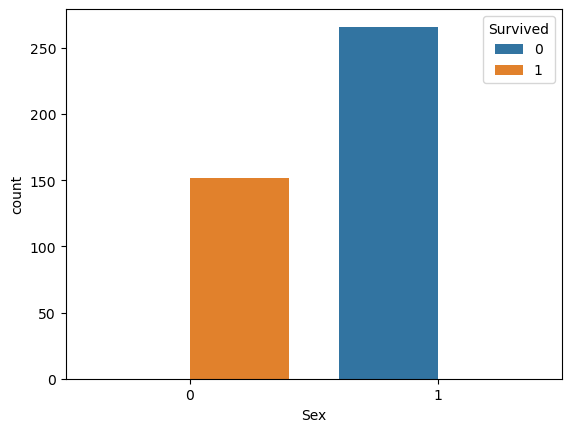

In [34]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
# After dropping non required column
df=df.drop(['Age'], axis=1)

In [37]:
df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,24.1500,S


In [38]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [39]:
df=df.replace({'sex':{'male':1,'female':0}, 'Embarked':{'S':0, 'C':1, 'Q':3}})
# converting categorical Columns

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,0


# Seperating features & Target

In [41]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

In [42]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,3
1,3,0,1,0,7.0000,0
2,2,1,0,0,9.6875,3
3,3,1,0,0,8.6625,0
4,3,0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,1,0,0,8.0500,0
414,1,0,0,0,108.9000,1
415,3,1,0,0,7.2500,0
416,3,1,0,0,8.0500,0


In [43]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Splitting the data into training data & Test data

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
x_tr,x_test,y_tr,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(418, 6) (334, 6) (84, 6)


# Model Training

In [47]:
x= df[['Pclass', 'Sex']]
Y=df['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# training the Logistic Regression model with training data

In [49]:
LogisticRegression()

LogisticRegression()